[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pytextbook/pytextbook/blob/main/6.1.%20국민청원%20분석%20및%20시각화.ipynb)


# 국민청원 데이터 분석하기

데이터 분석을 위한 판다스, 수치 계산을 위한 넘파이 불러오기

In [36]:
import pandas as pd
import numpy as np

#버전 확인
print(pd.__version__)
print(np.__version__)

2.2.2
1.26.4


In [37]:
# 출력 데이터를 깔끔하게 표시하기 위해
import warnings
warnings.filterwarnings('ignore')

여기에서는 시각화 도구로 [plotnine(A grammar of graphics for Python)](https://github.com/has2k1/plotnine)을 사용한다.

In [38]:
!pip install plotnine

In [39]:
from plotnine import *

# 판다스로 데이터 불러오기
* 데이터 출처 : https://github.com/akngs/petitions

In [40]:
import os
import platform

base_path = "data"
file_name = "petition.csv"

def file_exist_check(base_path, file_name):
    if os.path.exists(f"./{base_path}/{file_name}"):
        print(f"{os.getcwd()}/{base_path} 경로에 파일이 있음")
        return

    if not os.path.exists(base_path):
        os.makedirs(base_path)

    if platform.system() == "Linux":
        # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증하기
        !pip install -U -q PyDrive
        from pydrive.auth import GoogleAuth
        from pydrive.drive import GoogleDrive
        from google.colab import auth
        from oauth2client.client import GoogleCredentials

        auth.authenticate_user()
        gauth = GoogleAuth()
        gauth.credentials = GoogleCredentials.get_application_default()
        drive = GoogleDrive(gauth)
        url ='https://drive.google.com/open?id=1d8VEAj6n83wT1YRlCrhoU_1mMSvYpXc4'

        id = url.split('=')[1]
        downloaded = drive.CreateFile({'id':id})
        downloaded.GetContentFile(f'{base_path}/{file_name}')
        print(f"사용자의 구글 드라이브에 {base_path}/{file_name} 다운로드 완료")
        return
    else:
        print(f"{file_link} 에서 다운로드 받아 실습 경로 {os.getcwd()}/{base_path}에 옮겨주세요.""")
        return

file_exist_check(base_path, file_name)

/content/data 경로에 파일이 있음


### 다운로드 받은 데이터 살펴보기

In [41]:
petitions = pd.read_csv(f"{base_path}/petition.csv", index_col="article_id",
                       parse_dates=['start', 'end'])

# 데이터의 행과 열의 수 확인
petitions.shape


(377756, 7)

In [42]:
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377756 entries, 21 to 492043
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     377756 non-null  datetime64[ns]
 1   end       377756 non-null  datetime64[ns]
 2   answered  377756 non-null  int64         
 3   votes     377756 non-null  int64         
 4   category  377756 non-null  object        
 5   title     377756 non-null  object        
 6   content   377755 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 23.1+ MB


In [43]:
# 데이터셋의 정보를 볼 수 있다.
# 어떤 컬럼이 있고 몇 개의 데이터가 있으며 어떤 타입인지 볼 수 있다.
petitions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377756 entries, 21 to 492043
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   start     377756 non-null  datetime64[ns]
 1   end       377756 non-null  datetime64[ns]
 2   answered  377756 non-null  int64         
 3   votes     377756 non-null  int64         
 4   category  377756 non-null  object        
 5   title     377756 non-null  object        
 6   content   377755 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 23.1+ MB


In [44]:
# head를 통해 상위 몇 개의 데이터만을 본다.
# 기본은 5개를 불러오며, 괄호안에 숫자를 적어주면 숫자만큼 불러온다.
petitions.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [45]:
petitions.tail()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
492039,2019-01-09,2019-02-08,0,48,인권/성평등,박종철 의원. 폭행구속수사 및 의원직 박탈 청원합니다,나라돈으로 해외연수가서 현지 동반 가이드를 때려 안경 파편이 얼굴이 꽂혔답니다. C...
492040,2019-01-09,2019-02-08,0,5,정치개혁,각 정상들은 들으시요 국회의원을 학력과 무관한 양심 및 윤리가 있는 서민이 되어...,각 정당은 현재 국회의원 개개인을 심사하면 지탄받은 사람이 국\n회를 장악하고 있습...
492041,2019-01-09,2019-02-08,0,1,외교/통일/국방,남한땅에 옥류관을 오픈해주세요,말그대로 옥류관을 여기서 열면 진짜 재미있고 신나는 일이 일어날것 같은 느낌이 듭니...
492042,2019-01-09,2019-02-08,0,4,정치개혁,임종석실장님 수고많으셨습니다.,범죄정권이후 많은 어려움을 갖고 시작한 국민의정부.\n저급한 자칭 보수단체와 한국당...
492043,2019-01-09,2019-02-08,0,1,행정,예천군과 환경부를 규탄합니다. 어불성설인 가축사육 관련 법규를 개정해주세요!,해당 사건이 발생한 곳은 요즘은 매체에서 매일 나오는 곳으로 '군의원의 외유성 해외...


In [46]:
# 데이터프레임의 컬럼만을 불러올 수 있다.
petitions.columns

Index(['start', 'end', 'answered', 'votes', 'category', 'title', 'content'], dtype='object')

In [47]:
# petitions.describe?

In [48]:
# 숫자로 된 데이터에 대해 count, mean, std, min, max값 등을 볼 수 있다.
petitions.describe()

,start,end,answered,votes
count,377756,377756,377756.000000,3.777560e+05
mean,2018-05-15 05:35:15.155814912,2018-06-15 04:09:46.359449088,0.000077,1.514069e+02
min,2017-08-19 00:00:00,2017-08-26 00:00:00,0.000000,0.000000e+00
25%,2018-01-22 00:00:00,2018-02-21 00:00:00,0.000000,1.000000e+00
50%,2018-05-19 00:00:00,2018-06-18 00:00:00,0.000000,5.000000e+00
75%,2018-09-05 00:00:00,2018-10-05 00:00:00,0.000000,1.500000e+01
max,2019-01-09 00:00:00,2019-02-08 00:00:00,1.000000,1.192049e+06
std,NaN,NaN,0.008761,4.842551e+03


## 결측치가 있는지 확인

In [49]:
petitions.isnull().sum()

,0
start,0
end,0
answered,0
votes,0
category,0
title,0
content,1


content에만 1이 있고 나머지는 모두 0이므로 결측치가 없다.

## 판다스로 데이터 분석과 시각화

### 답변대상 청원 행 다시 만들기
기존의 answerd 항목은 청와대에서 답변을 했는지 여부를 알 수 있는 행이다. 그런데 데이터 중에는 답변 대기 중인 청원도 있으므로 이를 확인해야 한다. 비교연산자(==)를 이용해 20만개 이상의 동의를 받아 답변 대상인 청원에 대해 answer라는 새로운 행을 추가해 주었다.

In [50]:
(petitions['votes'] > 200000) == 1

,votes
article_id,
21,False
22,False
23,False
24,False
25,False
...,...
492039,False
492040,False
492041,False


In [51]:
petitions['answer'] = (petitions['votes'] > 200000) == 1
petitions.shape

(377756, 8)

출력 결과를 보면 행이 8개로 하나 늘었다. head(3)로 처음부터 3개의 데이터를 육안으로 확인해 본다.

In [52]:
petitions.head(3)

,start,end,answered,votes,category,title,content,answer
article_id,,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...,False
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...,False
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...",False


### 청원기간 컬럼 생성

In [53]:
petitions['duration'] = petitions['end'] - petitions['start']
petitions.sort_values('duration', ascending=True).head(3)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
13577,2017-09-12,2017-09-19,0,20,육아/교육,사립유치원의 집단휴업을 반대합니다,국공립 유치원도 없고 국공립어린이집 들어가기도 힘든 실정에 사립유치원은 부모들의 어...,False,7 days
4213,2017-09-05,2017-09-12,0,1,인권/성평등,청소년 보호법이 아니라 소년법입니다...,소년법 폐지 청원합니다,False,7 days
4214,2017-09-05,2017-09-12,0,0,정치개혁,소년법 강화,이번 부산여중생 사건을보고 느낍니다.\n소년법 폐지해주셨으면 좋겠습니다.\n아님 강...,False,7 days


### 청원기간별 건

In [54]:
petitions['duration'].value_counts()

,count
duration,
30 days,366556
90 days,6754
7 days,2436
15 days,1204
60 days,806


#### 청원기간이 90일이고 답변 대상 건

In [55]:
petitions[(petitions['duration'] == '90 days') & (petitions['answer'] == 1)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days


#### 청원기간이 60일이고 답변 대상 건

In [56]:
petitions_60_answer = petitions[(petitions['duration'] == '60 days') & (petitions['answer'] == 1)]
print(petitions_60_answer.shape)
petitions_60_answer.head()

(1, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days


#### 청원기간이 30일이고 답변 대상 건

In [57]:
petitions_30_answer = petitions[(petitions['duration'] == '30 days') \
                                    & (petitions['answer'] == 1)]
print(petitions_30_answer.shape)
petitions_30_answer.head(3)

(75, 9)


,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


#### 청원기간이 7일이고 답변 대상 건

In [58]:
petitions_7_answer = petitions[(petitions['duration'] == '7 days') \
                                   & (petitions['answer'] == 1)]
print(petitions_7_answer.shape)
petitions_7 = petitions[(petitions['duration'] == '7 days')]
print(petitions_7.shape)
petitions_7_count = petitions_7['start'].value_counts().reset_index()
petitions_7_count.columns = ['start', 'count']
petitions_7_count.sort_values('start', ascending=True)

(0, 9)
(2436, 9)


,start,count
25,2017-08-19,9
21,2017-08-20,18
17,2017-08-21,21
23,2017-08-22,15
16,2017-08-23,22
22,2017-08-24,18
18,2017-08-25,20
20,2017-08-26,19
24,2017-08-27,11
15,2017-08-28,24


### 청원 기간과 분야별 분석

어느 분야의 청원이 가장 많이 들어왔는지 확인

In [59]:
category = pd.DataFrame(petitions['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,59020
1,기타,46449
2,인권/성평등,33738
3,안전/환경,29196
4,교통/건축/국토,26910
5,외교/통일/국방,25705
6,육아/교육,24861
7,보건복지,23608
8,일자리,22111
9,행정,19373


## 청원이 얼마 동안 집계되었는지

In [60]:
start_df = pd.DataFrame(petitions['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
print('청원 집계: {}일'.format(start_df.shape[0]))
start_df.head()

청원 집계: 509일


,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


## 피봇 테이블로 투표를 가장 많이 받은 분야 보기

In [63]:
# pd.pivot_table?

In [65]:
# petitions_unique = pd.pivot_table(petitions, index=['category'], aggfunc=np.sum)
# petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
# petitions_best

import numpy as np
import pandas as pd

# 숫자형 열만 선택해 sum 수행
petitions_unique = pd.pivot_table(
    petitions,
    index=['category'],
    aggfunc={col: np.sum for col in petitions.select_dtypes(include=[np.number]).columns}
)

# 'votes' 기준으로 정렬
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
print(petitions_best)

       category  answered                        duration     votes
0        인권/성평등         9   70121 days 02:07:11.452241920  12225998
1         안전/환경         2   69678 days 01:41:45.161793536   6512799
2          정치개혁         2   81475 days 03:23:30.323587072   5686172
3            기타         1 -66796 days +02:58:04.033138688   4720310
4         육아/교육         1 -43505 days +01:41:45.161793536   4420589
5          보건복지         2   74499 days 01:16:18.871345152   4269399
6   문화/예술/체육/언론         4   95026 days 00:50:52.580896768   4086382
7      외교/통일/국방         1 -77983 days +01:41:45.161793536   3637926
8      교통/건축/국토         2 -42188 days +01:41:45.161793536   2834727
9          반려동물         0 -97157 days +00:25:26.290448384   2023905
10        경제민주화         1   62196 days 00:50:52.580896768   1720766
11           행정         1 -51654 days +01:16:18.871345152   1665855
12           미래         1 -99206 days +01:16:18.871345152   1120174
13          일자리         0   28749 days 01:16:18.

## 투표를 가장 많이 받은 날

In [66]:
# petitions_start = pd.pivot_table(petitions, index=['start'], aggfunc=np.sum)
# votes_df = petitions_start.sort_values(by='votes', ascending=False)
# votes_df.loc[petitions_start['votes'] > 350000]

import numpy as np
import pandas as pd

# 숫자형 열만 대상으로 집계
numeric_columns = petitions.select_dtypes(include=[np.number]).columns

petitions_unique = pd.pivot_table(
    petitions,
    index=['category'],
    values=numeric_columns,  # 숫자형 열만 사용
    aggfunc=np.sum
)

# 'votes' 열 기준 정렬
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
print(petitions_best)


       category  answered                        duration     votes
0        인권/성평등         9   70121 days 02:07:11.452241920  12225998
1         안전/환경         2   69678 days 01:41:45.161793536   6512799
2          정치개혁         2   81475 days 03:23:30.323587072   5686172
3            기타         1 -66796 days +02:58:04.033138688   4720310
4         육아/교육         1 -43505 days +01:41:45.161793536   4420589
5          보건복지         2   74499 days 01:16:18.871345152   4269399
6   문화/예술/체육/언론         4   95026 days 00:50:52.580896768   4086382
7      외교/통일/국방         1 -77983 days +01:41:45.161793536   3637926
8      교통/건축/국토         2 -42188 days +01:41:45.161793536   2834727
9          반려동물         0 -97157 days +00:25:26.290448384   2023905
10        경제민주화         1   62196 days 00:50:52.580896768   1720766
11           행정         1 -51654 days +01:16:18.871345152   1665855
12           미래         1 -99206 days +01:16:18.871345152   1120174
13          일자리         0   28749 days 01:16:18.

## 청원을 많이 받은 날 VS 투표를 많이 받은 날

In [68]:
# # 인덱스로 되어있는 start를 키로 사용하기 위해
# # index로 설정된 start를 컬럼으로 변경해주고 인덱스를 생성한다.
# votes_df = votes_df.reset_index()
# votes_df.head()

import numpy as np
import pandas as pd

# 숫자형 열만 대상으로 집계
petitions_unique = pd.pivot_table(
    petitions,
    index='category',
    values='votes',  # 'votes' 열만 집계
    aggfunc=np.sum
)

# 'votes' 기준 정렬
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
print(petitions_best)


       category     votes
0        인권/성평등  12225998
1         안전/환경   6512799
2          정치개혁   5686172
3            기타   4720310
4         육아/교육   4420589
5          보건복지   4269399
6   문화/예술/체육/언론   4086382
7      외교/통일/국방   3637926
8      교통/건축/국토   2834727
9          반려동물   2023905
10        경제민주화   1720766
11           행정   1665855
12           미래   1120174
13          일자리   1113973
14         성장동력    866240
15    저출산/고령화대책    174841
16         농산어촌    114822


In [84]:
# hottest_day_df = start_df.merge(votes_df, on='start', how='left')
# hottest_day_df.nlargest(5, "votes")

import numpy as np
import pandas as pd

# 숫자형 열만 대상으로 집계
petitions_unique = pd.pivot_table(
    petitions,
    index='category',
    values='votes',  # 'votes' 열만 집계
    aggfunc=np.sum
)

# 'votes' 기준 정렬
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
print(petitions_best)


       category     votes
0        인권/성평등  12225998
1         안전/환경   6512799
2          정치개혁   5686172
3            기타   4720310
4         육아/교육   4420589
5          보건복지   4269399
6   문화/예술/체육/언론   4086382
7      외교/통일/국방   3637926
8      교통/건축/국토   2834727
9          반려동물   2023905
10        경제민주화   1720766
11           행정   1665855
12           미래   1120174
13          일자리   1113973
14         성장동력    866240
15    저출산/고령화대책    174841
16         농산어촌    114822


In [85]:
# hottest_day_df.nlargest(5, "counts")

import numpy as np
import pandas as pd

# 숫자형 열만 대상으로 집계
petitions_unique = pd.pivot_table(
    petitions,
    index='category',
    values='votes',  # 'votes'만 집계 대상으로 사용
    aggfunc=np.sum
)

# 'votes' 기준 정렬
petitions_best = petitions_unique.sort_values(by='votes', ascending=False).reset_index()
print(petitions_best)


       category     votes
0        인권/성평등  12225998
1         안전/환경   6512799
2          정치개혁   5686172
3            기타   4720310
4         육아/교육   4420589
5          보건복지   4269399
6   문화/예술/체육/언론   4086382
7      외교/통일/국방   3637926
8      교통/건축/국토   2834727
9          반려동물   2023905
10        경제민주화   1720766
11           행정   1665855
12           미래   1120174
13          일자리   1113973
14         성장동력    866240
15    저출산/고령화대책    174841
16         농산어촌    114822


## 답변 대상 청원
- 20만건 이상의 투표를 받으면 답변을 받을 수 있는 청원이 된다.

In [71]:
answered_df = petitions.loc[petitions['votes'] > 200000]
print('답변 대상 청원: {}건'.format(answered_df.shape[0]))

답변 대상 청원: 77건


In [72]:
answered_df.head()

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,True,60 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,True,30 days
26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",True,30 days
45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",True,30 days


### 답변 대상 청원 중 투표를 가장 많이 받은 것

In [73]:
answered_df.sort_values('votes', ascending=False).head(10)

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
269548,2018-06-13,2018-07-13,0,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ...",2012년 난민법 제정으로 인해 외국인은 한달 무비자로 입국할 수 있으나 난민신청자...,True,30 days
10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,True,90 days
142600,2018-02-19,2018-03-21,1,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다","오늘 여자 단체전 팀추월에서 김보름, 박지우 선수는 팀전인데도 불구하고 개인의 영달...",True,30 days
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days
314584,2018-07-22,2018-08-21,0,413924,육아/교육,23개월 아기가 폭행에 장이 끊어져 죽었습니다.,고생하시는 청와대 관계자 및 대통령님.\n이 글을 꼭 한번만 읽어주세요.\n너무나 ...,True,30 days
395955,2018-10-02,2018-11-01,1,406655,교통/건축/국토,음주운전 교통사고로 친구 인생이 박살났습니다. 제발 도와주세요,"9월 25일 새벽 2시 25분 경, 부산 해운대구 미포 오거리에서 술에 만취한 운전...",True,30 days
437737,2018-11-09,2018-12-09,0,397079,인권/성평등,억울하게 떠나신 저의 아버지의 원한을 풀어주세요,46일동안 눈 한번 뜨시지 못한 채 11월 6일 새벽 4시에 저의 아버지가 억울하게...,True,30 days


## 시각화
## [A Grammar of Graphics for Python — plotnine](http://plotnine.readthedocs.io/en/stable/index.html)
* [tutorial](http://plotnine.readthedocs.io/en/stable/tutorials.html)
* [ggplot2-cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* 이미지 출처 : [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional…](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

<img src="https://cdn-images-1.medium.com/max/2000/1*mcLnnVdHNg-ikDbHJfHDNA.png">

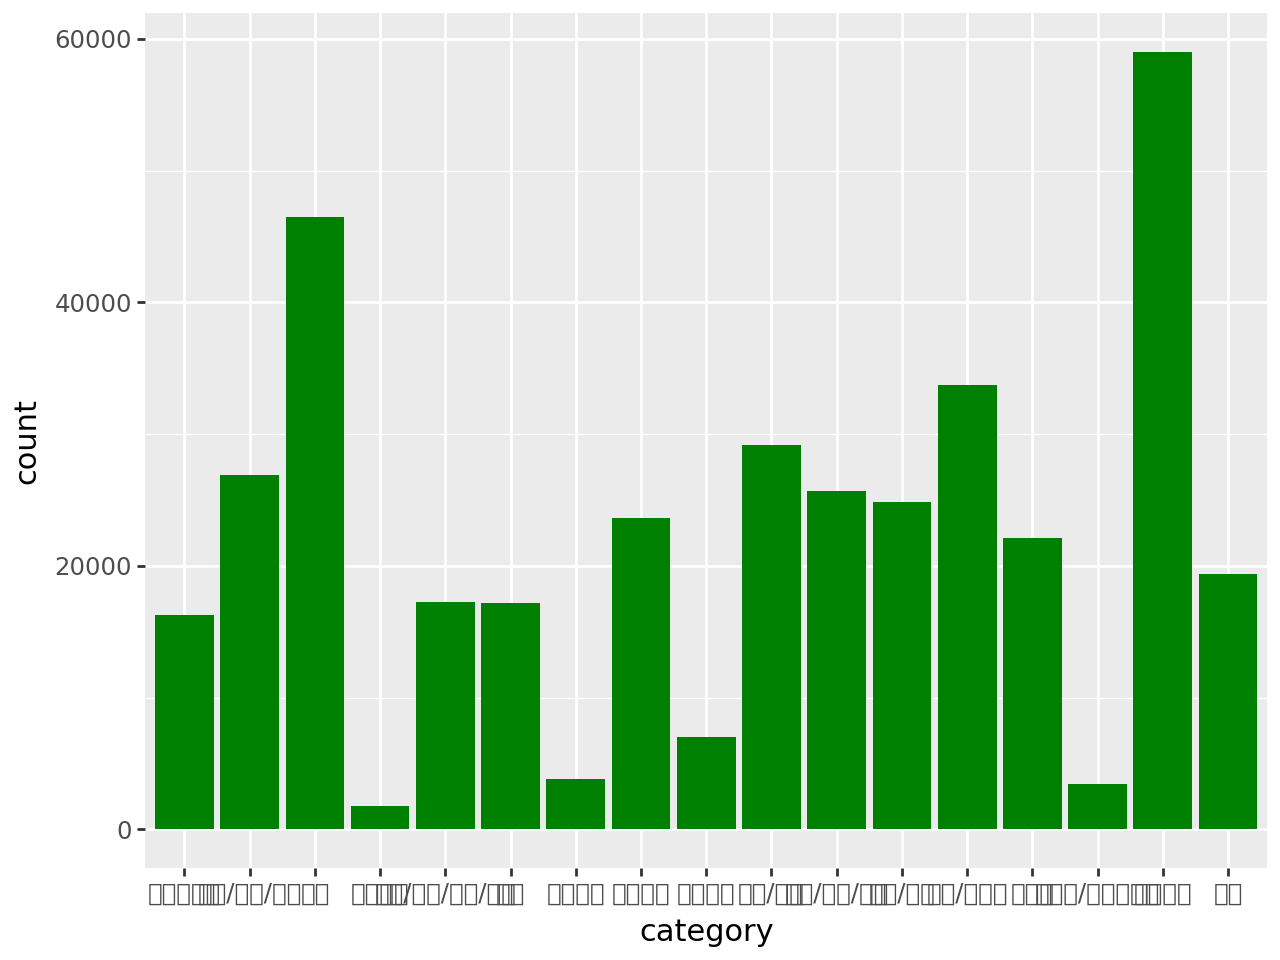

In [74]:
# 카테고리별로 집계된 데이터를 barplot으로 그려본다.
# 그런데 한글이 깨져보이는 것을 볼 수 있다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
)

## 시각화를 위해 한글폰트 설치

#### 한글폰트 사용하기
* 참고 : [plotnine.themes.element_text — plotnine documentation](http://plotnine.readthedocs.io/en/stable/generated/plotnine.themes.element_text.html)

In [75]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 46.8 MB/s eta 0:00:00


In [76]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

font_family = 'NanumGothic'
font_family


'NanumGothic'

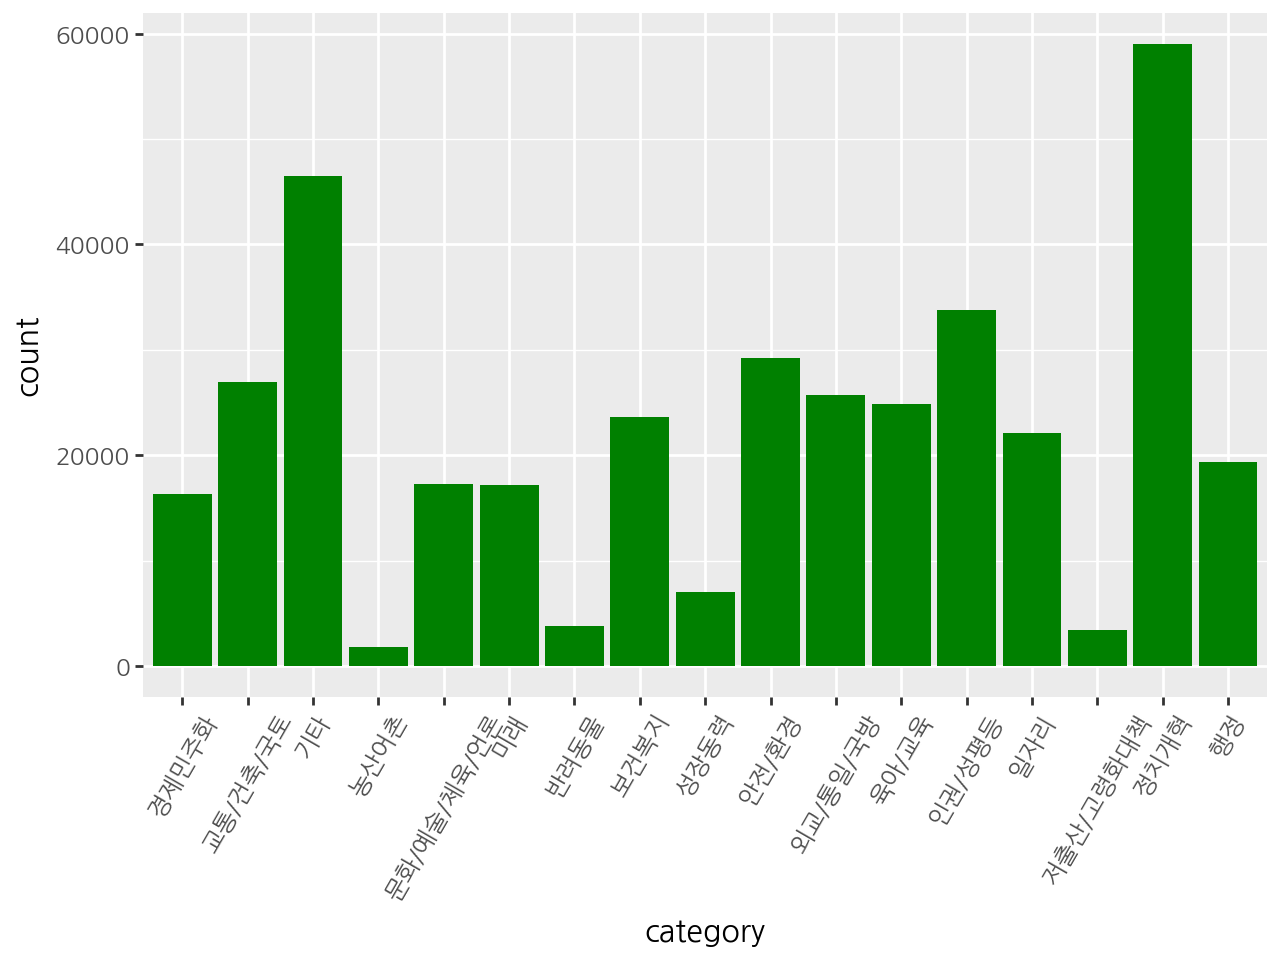

In [77]:
# 글씨가 겹쳐보이지 않도록 rotation도 추가했다.
(ggplot(petitions)
 + aes('category')
 + geom_bar(fill='green')
 + theme(text=element_text(family=font_family),
        axis_text_x=element_text(rotation=60))
)

### 카테고리별 투표수

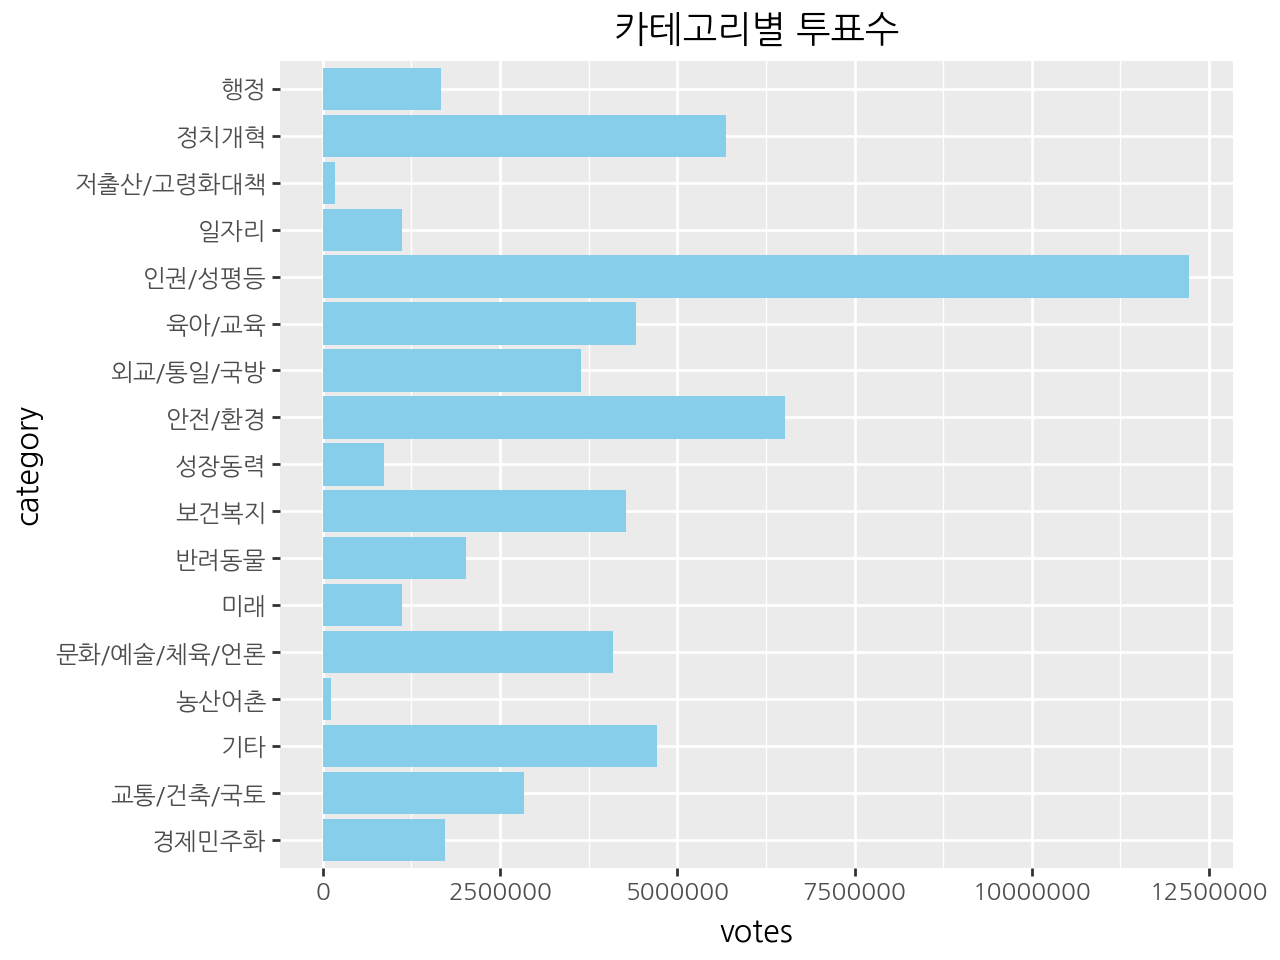

In [78]:
# coord_flip을 사용해서 x축과 y축을 바꿔본다.
(ggplot(petitions)
 + aes(x='category', y='votes')
 + geom_col(fill='skyblue')
 + ggtitle('카테고리별 투표수')
 + coord_flip()
 + theme(text=element_text(family=font_family))
)

In [79]:
# 투표를 가장 많이 받은 카테고리인 인권/성평등에서 투표수가 많은 순으로 보기
human = petitions.loc[(petitions['category']=='인권/성평등')]
human.sort_values('votes', ascending=False)[:2]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
230552,2018-05-11,2018-06-10,1,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.,최근 홍대 누드크로키 모델의 불법촬영 사건이 있었습니다.\n사건은 굉장히 빠르게 처...,True,30 days
426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....,True,30 days


일별 투표수

In [80]:
petition_votes = petitions.groupby(['start'])['votes'].sum().reset_index()
petition_votes.columns = ['start', 'votes']
petition_votes.head()

,start,votes
0,2017-08-19,20703
1,2017-08-20,31710
2,2017-08-21,1884
3,2017-08-22,2607
4,2017-08-23,13446


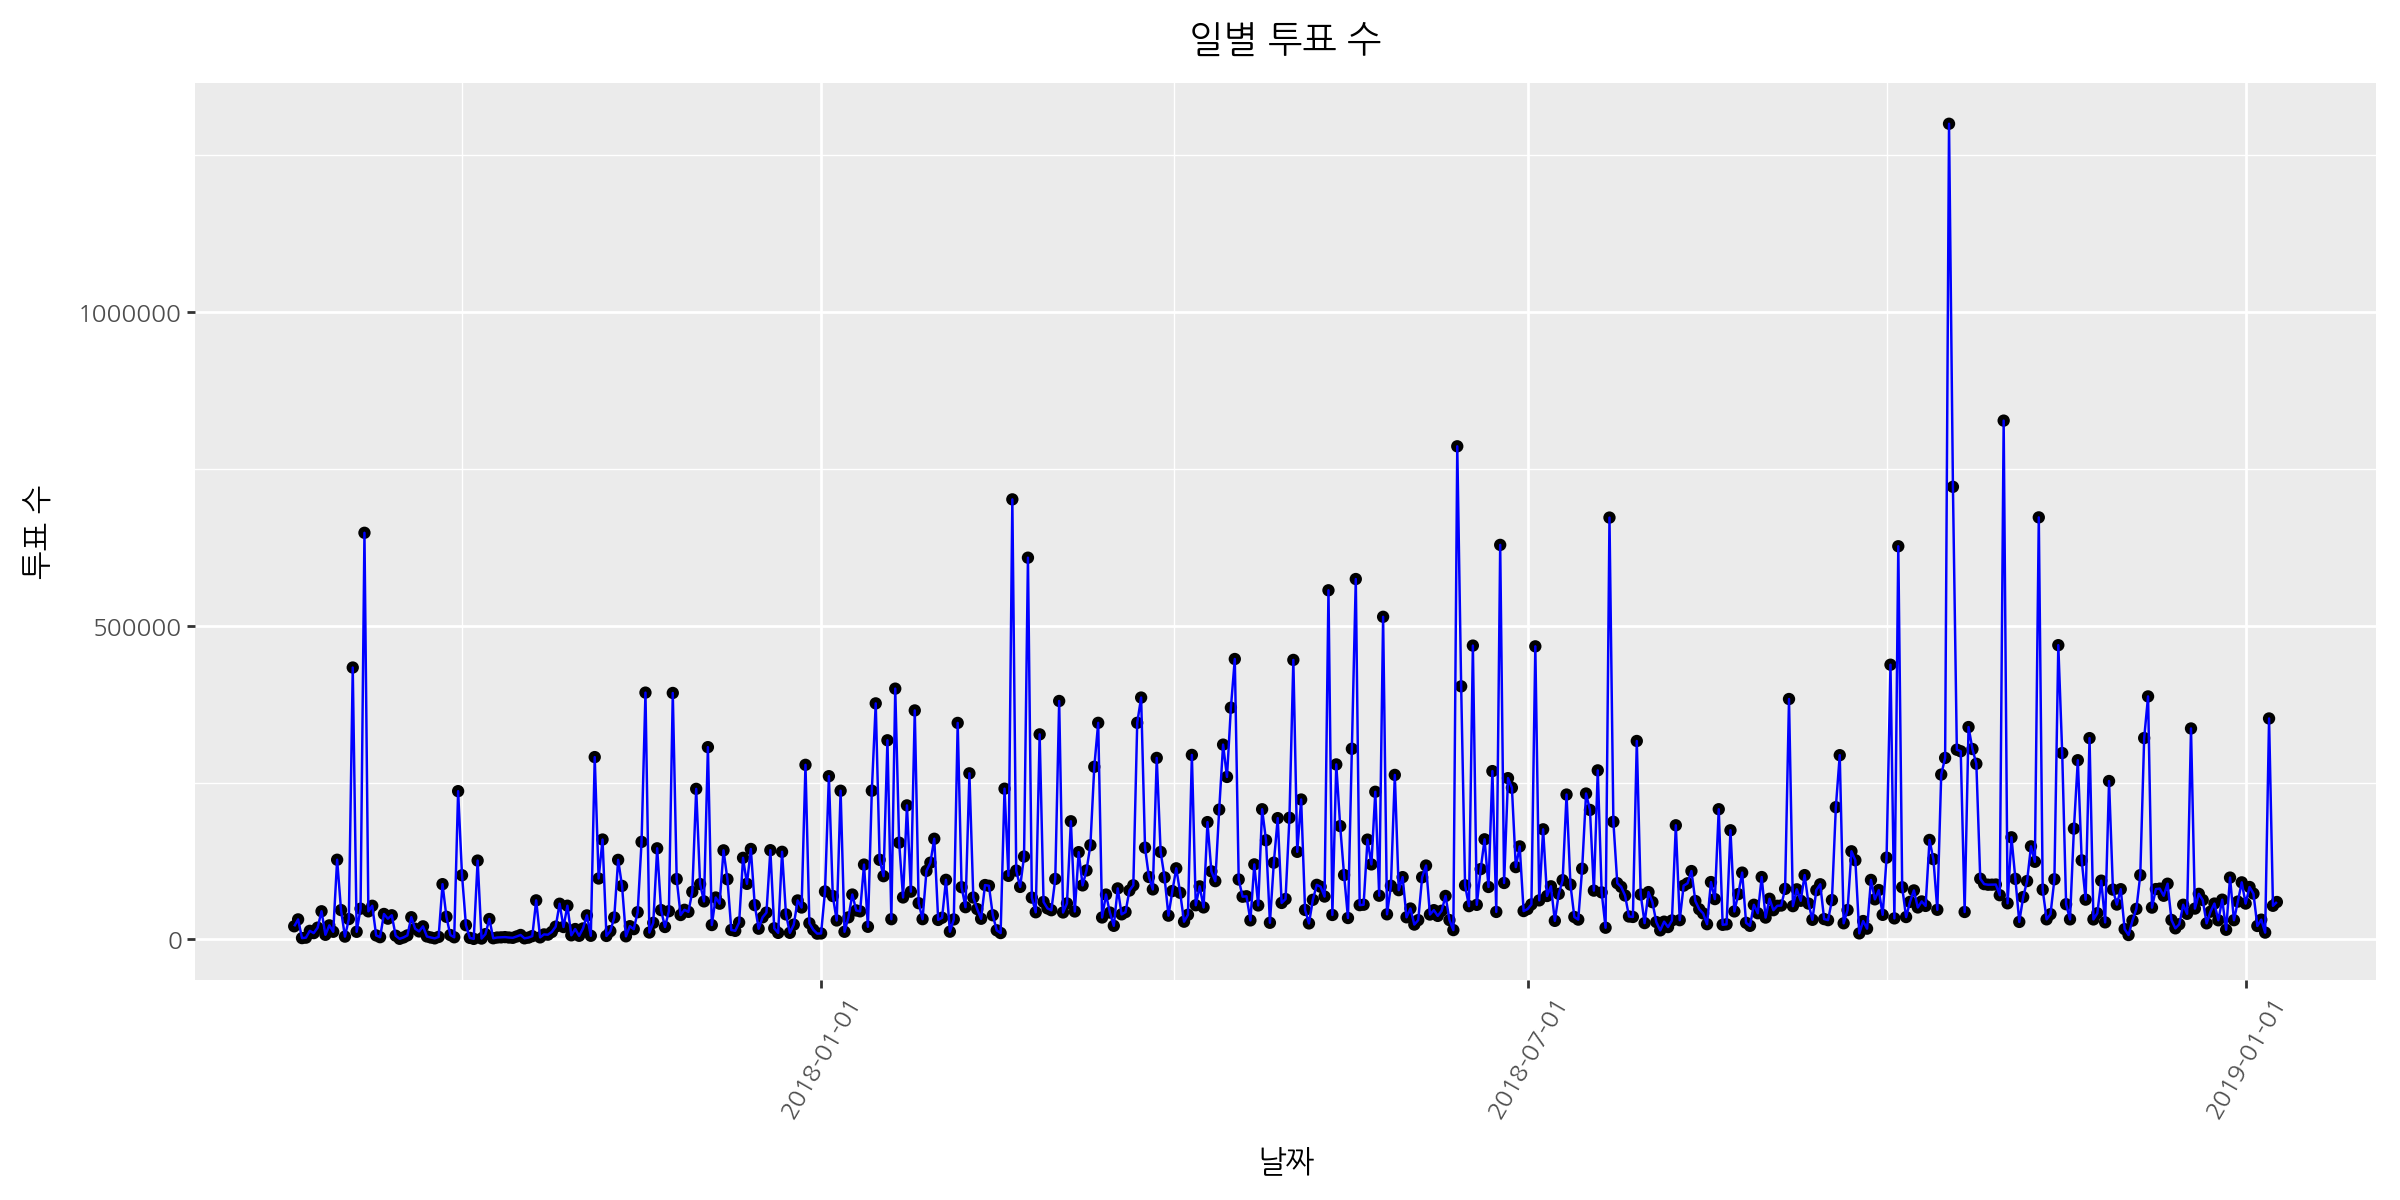

In [81]:
(ggplot(petition_votes)
 + aes(x='start', y='votes')
 + geom_point()
 + geom_line(color='blue')
 + labs(x='날짜', y='투표 수', title='일별 투표 수')
 + theme(text=element_text(family=font_family),
        figure_size=(12,6),
        axis_text_x=element_text(rotation=60))
)

2018년 10월 17일이 투표가 가장 많았기 때문에 일별 투표 수에서도 가장 높게 나타남

In [82]:
petition_votes[petition_votes['votes'] > 1000000]

,start,votes
424,2018-10-17,1300523


In [83]:
petitions[(petitions['start'] == '2018-10-17') &
          (petitions['votes'] > 1000000)]

,start,end,answered,votes,category,title,content,answer,duration
article_id,,,,,,,,,
408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,True,30 days
